<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/main/Optics/RayMatrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mathemathical background

In mathematics, a '''matrix''' is a Rectangular array or table, arranged in rows and columns, which is used to represent a mathematical object or a property of such an object.

For example,
\begin{bmatrix}1 & 2 & -10 \\12 & 3 & -8 \end{bmatrix}
is a matrix with two rows and three columns. This is often referred to as a "two by three matrix", a " $2\times 3$ matrix", or a matrix of dimension $2\times 3$.

Matrices are used to represent linear maps and allow explicit computations in linear algebra. Therefore, the study of matrices is a large part of linear algebra, and most properties and operation (mathematics)|operations]] of abstract linear algebra can be expressed in terms of matrices. For example, matrix multiplication represents the composition of linear maps.




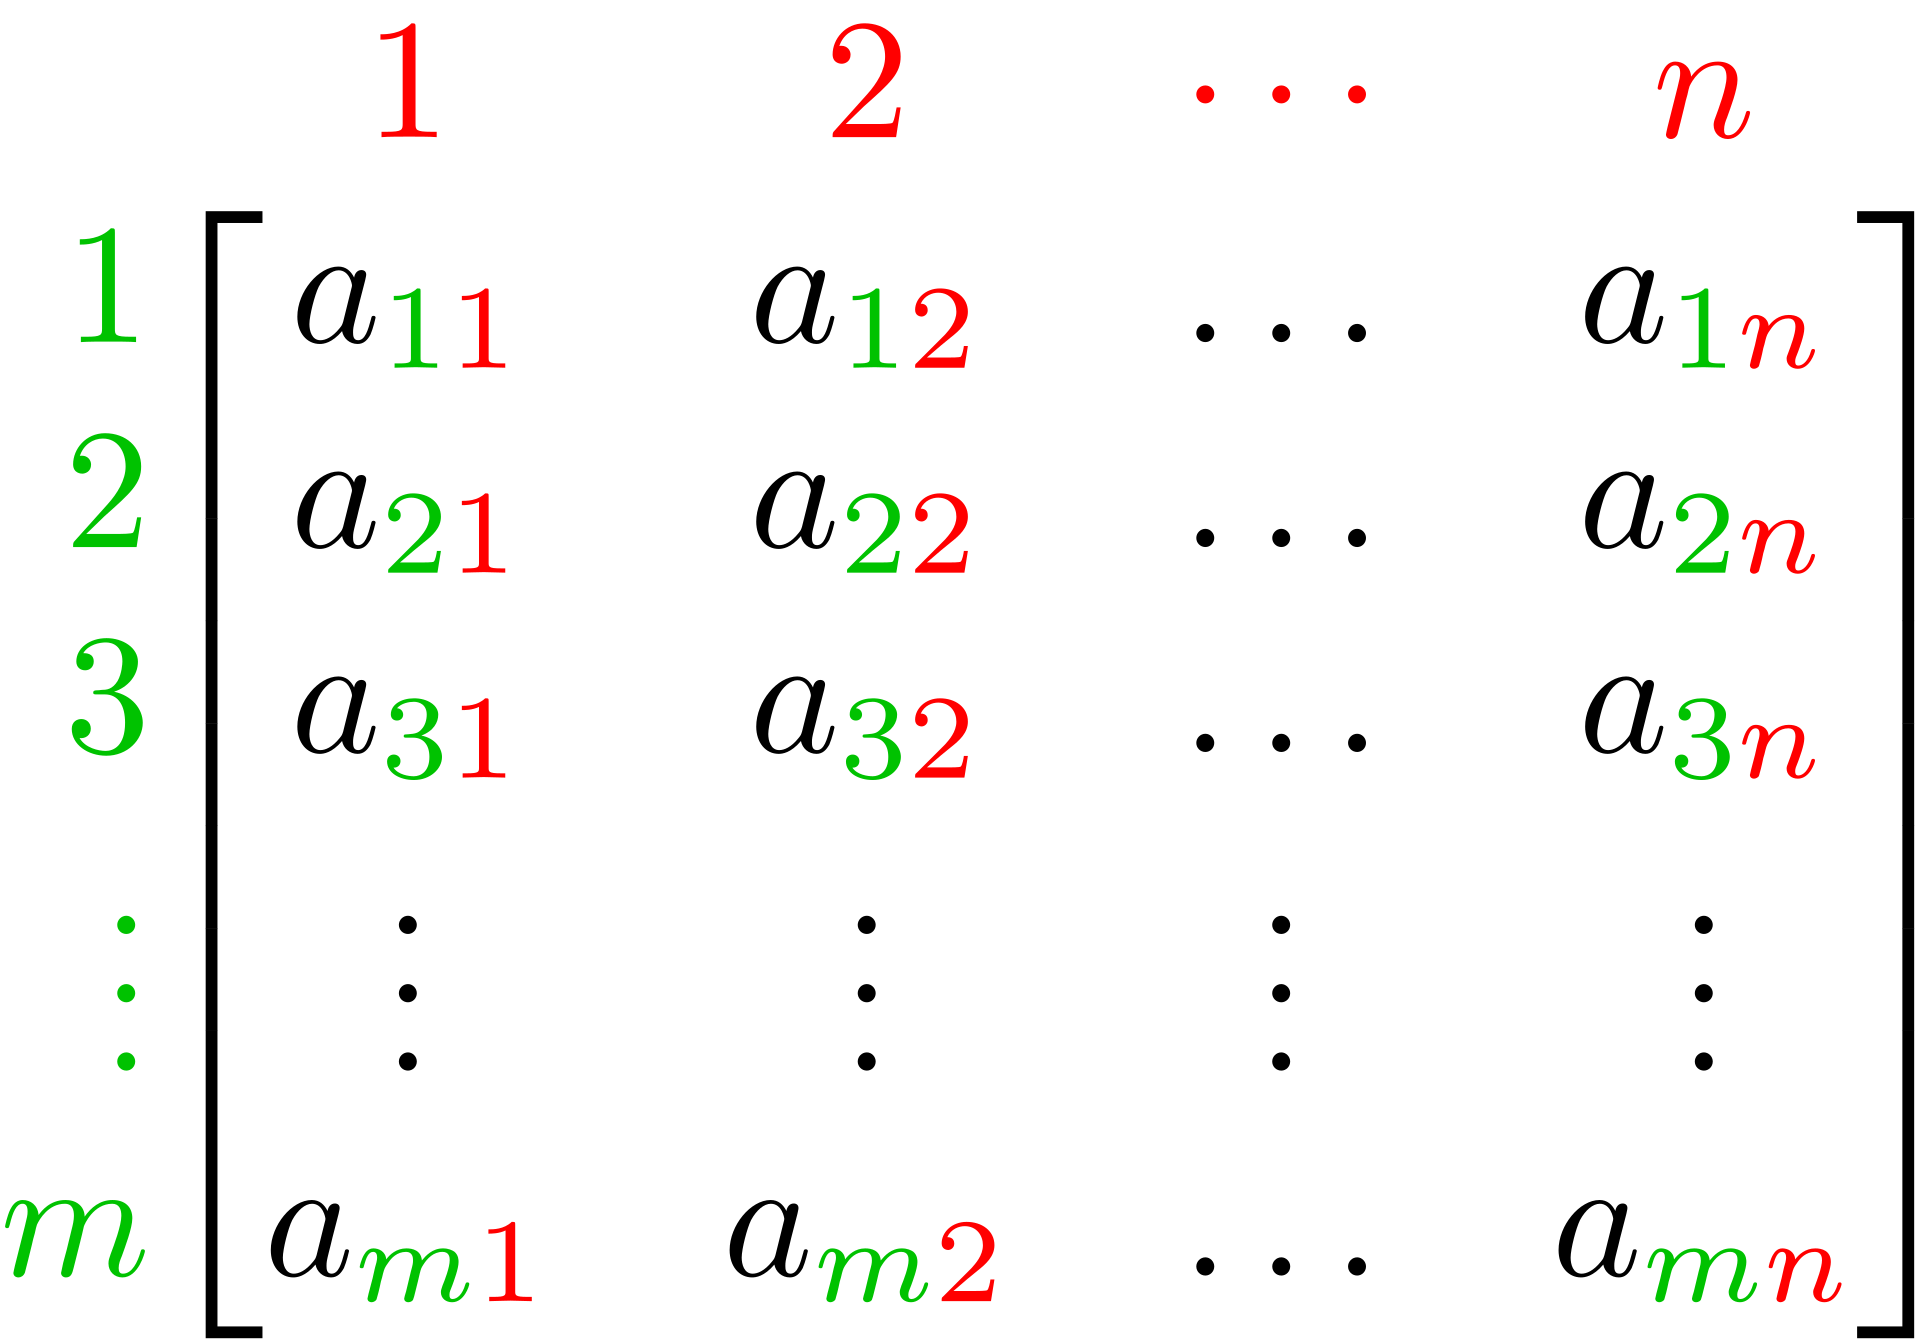


The snippet below shows how to define a $2 \times 2 $ matrix, as well as how to print it. The

In [ ]:
import numpy as np
from tabulate import tabulate

# Define two 2x2 matrices
A = np.array([[1, 2], [3, 4]])


print(A )
print(tabulate(A, tablefmt='fancy_grid'))


In [ ]:
B = np.array([[5, 6], [7, 8]])

# Multiply the matrices using numpy.dot()
C = np.dot(A, B)

# Print the resulting matrix
print(tabulate(C, tablefmt='fancy_grid'))

In mathematics, matrices are typically represented as rectangular arrays of numbers, with rows and columns labeled by indices starting from 1.
In computer science, however, matrices are often represented as nested lists or arrays, where the first index corresponds to the row and the second index corresponds to the column.

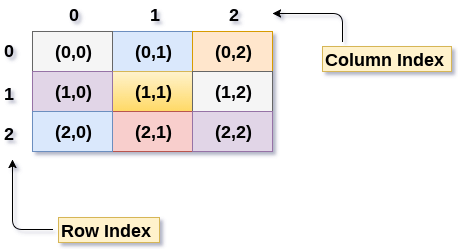

*This difference in indexing conventions can lead to confusion when translating mathematical equations into code*.

The code snippet below demonstrates how to access and extract specific elements, rows, and columns from a 2D array. It showcases different indexing techniques to retrieve individual elements, entire rows, and columns from the array.

1. Extracting specific elements:
    - In computer science, one starts counting with zero instead of one. Therefore, the code to print the element of the first row  and first column is `A[0, 0]`
    - To print the element of the second row, second column, one needs `A[1, 1]`.
    
2. Printing formatted extractions:
    - The code uses formatted strings to clarify which element is being extracted. For instance:
        - `print("Extract first row, second column element: {0}".format(A[0, 1]))`
        - `print("Extract second row, first column element: {0}".format(A[1, 0]))`
    - These formatted prints enhance readability by explicitly stating what is being extracted.

3. Extracting rows and columns:
    - We can extract the first column using slicing notation `A[:, 0]`.
    - Similarly, we extracts the second row using `A[1, :]`.


In [ ]:

fancyA= tabulate(A, tablefmt='fancy_grid')
print("The matrix is {0}".format(fancyA))

# Extract the element of the first row, first column:
print("Extract the  first row, first column element: {0}".format(A[0, 0]))

# Extract the second element of the second row:
print("Extract second row, second column element:  {0}".format(A[1, 1]))

# Extract first row, second column element:
print(A[0, 1])
print("Extract first row, second column elemen with A[0, 1] yields: {0}".format(A[0, 1]))

# Extract the second row, first column element:
print(A[1, 0])
print("Extract second row, first column element with A[1,0] yields: {0}".format(A[1, 0]))

# Extract the first column:
print(A[:, 0])

# Extract the second row:
print(A[1, :])


## Ray Matrices


The code below defines different matrices as a function

In [ ]:
def lensMatrix(focal_length):
    """
    Lens Matrix with a focal length.

    Args:
    focal_length: Focal length of the lens in meters.

    Returns:
    Matrix associated with lens.
    """
    L = np.array([[1, -1 / focal_length],
                  [0, 1]])
    return L

def freeSpaceMatrix(x):
    """
    Free Space Matrix for a propagation over a distance x.

    Args:
     x: propagation distance in meters.

    Returns:
    Matrix associated with lens.
    """
    S = np.array([[1, 0],
                  [x, 1]])
    return S

def mirrorMatrix():
    """
    Matrix for mirror surface

    Returns:
    Matrix after reflection at the mirror.
    """
    # matrix for mirror reflection
    A = np.array([[1, 0],
                  [0, 1]])
    return A

def curvedInterfaceMatrix( n_1, n_2 , R):
    """
    Matrix for a curved Interface
    Args:
      n_1: index of refraction of incidence medium
      n_2: index of refraction of transmitted medium
      R: radius of curvature (from medium 2)

    Returns:
    Matrix.
    """
    element11 = n_1/n_2
    element12 = (n_1-n_2)/(R*n_2)
    # Transformation matrix for mirror reflection
    A = np.array([[element11, element12 ],
                  [0, 1]])
    return A


In [ ]:
# prompt: Write a code that uses ray matrices such as  Incident ray: [alpha=45 degrees, y=1 ] to propagate rays through lenses, curved mirrors and different media

def propagate_through_lens(ray, focal_length):
  """
  Propagates a ray through a lens with a given focal length.

  Args:
    ray: A NumPy array representing the ray, with the first element being the angle and the second element being the y-coordinate.
    focal_length: The focal length of the lens in meters.

  Returns:
    A NumPy array representing the ray after passing through the lens.
  """
  L = lensMatrix(focal_length)
  transformed_ray = np.dot(L, ray)
  return transformed_ray


# Example usage:
incident_ray = np.array([np.pi/4, 1 ])  # Incident ray: [alpha=45 degrees, y=1 ]
focal_length = 10  # Focal length of the lens

# Propagate through lens
transformed_ray = propagate_through_lens(incident_ray, focal_length)

print("Ray after passing through lens:", transformed_ray)


## Matrix multiplication with numpy

To carry out matrix multiplication, we use np.dot:


**np.dot(a,b)**

Here is the specification

Dot product of two arrays. Specifically,

- If both a and b are 1-D arrays, it is inner product of vectors (without complex conjugation).

- If both a and b are 2-D arrays, it is matrix multiplication, but using matmul or a @ b is preferred.

- If either a or b is 0-D (scalar), it is equivalent to multiply and using numpy.multiply(a, b) or a * b is preferred.

- If a is an N-D array and b is a 1-D array, it is a sum product over the last axis of a and b

## Plotting with matplotlib

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()


ax.plot([0, 10], [0, 10], 'r-')
ax.plot([2, 10], [0, 10], 'r-')
ax.axvline(5,0,1, color='b')

# Set the axes labels
ax.set_xlabel('Optical Axis (m)')
ax.set_ylabel('Y-axis')



# Set the title of the plot
ax.set_title('Fan of Rays')

# Show the plot
plt.show()


In [ ]:

import numpy as np

# Define a function to propagate a ray through a lens
def propagate_through_lens(ray, focal_length):
    """
    Propagates a ray through a lens with a given focal length.

    Args:
    ray: A 2x1 numpy array representing the ray, where the first element is the angle of incidence in radians and the second element is the height of the ray above the optical axis.
    focal_length: The focal length of the lens in meters.

    Returns:
    A 2x1 numpy array representing the ray after it has passed through the lens.
    """

    # Create the lens matrix
    L = np.array([[1, 0],
                  [-1 / focal_length, 1]])

    # Multiply the ray matrix by the lens matrix to propagate the ray
    transformed_ray = np.dot(L, ray)

    return transformed_ray

# Define a function to reflect a ray at a curved mirror
def reflect_at_curved_mirror(ray, mirror_radius):
    """
    Reflects a ray at a curved mirror with a given radius of curvature.

    Args:
    ray: A 2x1 numpy array representing the ray, where the first element is the angle of incidence in radians and the second element is the height of the ray above the optical axis.
    mirror_radius: The radius of curvature of the mirror in meters.

    Returns:
    A 2x1 numpy array representing the ray after it has been reflected at the mirror.
    """

    # Calculate the distance from the mirror's center of curvature to the point of incidence
    d = 1 / (2 * np.cos(ray[0]))

    # Create the mirror matrix
    M = np.array([[1, 0],
                  [-2 * d / mirror_radius, 1]])

    # Multiply the ray matrix by the mirror matrix to reflect the ray
    transformed_ray = np.dot(M, ray)

    return transformed_ray

# Define a function to propagate a ray through a medium with a given index of refraction
def propagate_through_medium(ray, index_of_refraction):
    """
    Propagates a ray through a medium with a given index of refraction.

    Args:
    ray: A 2x1 numpy array representing the ray, where the first element is the angle of incidence in radians and the second element is the height of the ray above the optical axis.
    index_of_refraction: The index of refraction of the medium.

    Returns:
    A 2x1 numpy array representing the ray after it has passed through the medium.
    """

    # Create the medium matrix
    M = np.array([[1, 0],
                  [0, index_of_refraction]])

    # Multiply the ray matrix by the medium matrix to propagate the ray
    transformed_ray = np.dot(M, ray)

    return transformed_ray

# Example usage:

# Define an incident ray
incident_ray = np.array([np.pi / 4, 1])  # Incident ray: [alpha=45 degrees, y=1 ]

# Propagate the ray through a lens with a focal length of 10 meters
transformed_ray = propagate_through_lens(incident_ray, 10)

# Reflect the ray at a curved mirror with a radius of curvature of 20 meters
transformed_ray = reflect_at_curved_mirror(transformed_ray, 20)

# Propagate the ray through a medium with an index of refraction of 1.5
transformed_ray = propagate_through_medium(transformed_ray, 1.5)

# Print the final ray
print("Final ray:", transformed_ray)


In [ ]:
# Define a function to plot a ray
def plot_ray(ray, x_i, x, ax, color='red'):
    """
    Plots a ray as a line segment in matplotlib.

    Args:
    ray: A 2x1 numpy array representing the ray, where the first element is the angle of incidence in radians and the second element is the height of the ray above the optical axis.
    x_i : initial x value
    x_f : displacement
    ax: context
    color: The color of the ray
    """

    x1 = x_i
    x2 = x + x_i

    alpha1, y1 = ray

    transmittedRay = np.dot(freeSpaceMatrix(x),ray)

    alpha2,y2 = transmittedRay

    # Plot the ray
    ax.plot([x1, x2], [y1, y2], color=color)

In [ ]:
# prompt:  plot simple rays in matplotlib

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import multi_dot

# Create a figure and axis
fig, ax = plt.subplots()

ax.set_xlim(-20, 20)
ax.set_ylim(-2, 2)

# Set the axes labels
ax.set_xlabel('Optical Axis (m)')
ax.set_ylabel('Y-axis')

# Set the title of the plot
ax.set_title('Fan of Rays')

alphas = np.linspace(-0.02,0.02,10)
for alpha in alphas:
  incident_ray = np.array([alpha, 1])

  freeSpaceRay=np.dot(freeSpaceMatrix(20),incident_ray)

  transmittedRay = np.dot(lensMatrix(5),freeSpaceRay)


  # Plot the incident ray
  plot_ray(incident_ray,-20,20,ax)
  plot_ray(transmittedRay,0,10,ax)


#position of lens
ax.axvline(0,0,1, color='b')

# Show the plot
plt.show()

In [ ]:

# Create a figure and axis
fig, ax = plt.subplots()

ax.set_xlim(-20, 20)
ax.set_ylim(-2, 2)

# Set the axes labels
ax.set_xlabel('Optical Axis (m)')
ax.set_ylabel('Y-axis')

# Set the title of the plot
ax.set_title('Beam of Rays')

ys = np.linspace(-1,1,10)
for y in ys:
  incident_ray = np.array([0,y])

  freeSpaceRay=np.dot(freeSpaceMatrix(20),incident_ray)

  transmittedRay = np.dot(lensMatrix(10),freeSpaceRay)


  # Plot the incident ray
  plot_ray(incident_ray,-20,20,ax)
  plot_ray(transmittedRay,0,20,ax)


#position of lens
ax.axvline(0,0,1, color='b')

# Show the plot
plt.show()

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.set_xlim(-20, 50)
ax.set_ylim(-2, 2)

# Set the axes labels
ax.set_xlabel('Optical Axis (m)')
ax.set_ylabel('Y-axis')

# Set the title of the plot
ax.set_title('Double Lens: Telescope')

ys = np.linspace(-1,1,10)


objective_length =10
eye_piece_length = 6
distance_o_e =15


for y in ys:
  incident_ray = np.array([0,y])

  freeSpaceRay1=np.dot(freeSpaceMatrix(20),incident_ray)

  transmittedRay1 = np.dot(lensMatrix(objective_length),freeSpaceRay1)

  freeSpaceRay2=np.dot(freeSpaceMatrix(distance_o_e),transmittedRay1)

  transmittedRay2=np.dot(lensMatrix(eye_piece_length),freeSpaceRay2)

  freeSpaceRay3=np.dot(freeSpaceMatrix(10),transmittedRay2)



  # Plot the incident ray
  plot_ray(incident_ray,-20,20,ax)
  plot_ray(transmittedRay1,0,distance_o_e,ax)
  plot_ray(transmittedRay2,distance_o_e,20,ax)


#position of objective
ax.axvline(0,0,1, color='b')

#position of eyepiece
ax.axvline(distance_o_e,0,1, color='b')


# Show the plot
plt.show()